# Get Token 

In [1]:
%run get_token.py

Enter Login Code: 4/iwrWu0iHf94468FdYLD58Op1h6v2wF_6J5n9F6E-muY#


# Gets List of Dates From Tokens

In [2]:
import datetime

#returns size of list
#note** size 1 = set size of 100 due to teh size of a token list
def set_size_of_list(size):
    
    return size


#returns a list of nextpagetokens- these tokens allow a user to see the next set of emails in the inbox
#note** one nextPageToken contains a list of 100 ids
def get_nextPageToken():
    response = service.users().messages().list(userId='me').execute()

    token =[]

    i = 0
    while 'nextPageToken' in response and i < 20:
        for k,v in response.items():
            if k == 'nextPageToken':
                token.append(v)
                response = service.users().messages().list(userId='me',pageToken = token[i]).execute()
                i = i + 1
            
    return token


# returns a list of ids from nextpagetokens visited
def get_id_list(n):

    next_token = get_nextPageToken()
    i = 0
    j = 0
    id_list = []

    while i < n:
        
        response = service.users().messages().list(userId='me', pageToken =next_token[i]).execute()
        for k,v in response.items():
            if k == 'messages':
                while j < 100:
                    for x,y in v[j].items():
                        if x =='id':
                            id_list.append(v[j].get('id'))
                        
                    j = j + 1
                
        i = i + 1
        j = 0
        
    return id_list


def get_date_from_email(message):
    dates = []
    for k,v in message.items():
        if k == 'internalDate':
            dates.append(datetime.datetime.fromtimestamp(float(unicode(v))/1000).strftime('%c'))
    return dates


def get_date_list(size_of_list):

    date_list = []

    for id_number in get_id_list(size_of_list):
        m = service.users().messages().get(userId='me', id= id_number ).execute()
        date_list.append(get_date_from_email(m))
    
    return  date_list 





In [3]:
# list size of 1 = gets a set size of 100 emails
dates = get_date_list(set_size_of_list(20))

# Plot Graphs 

In [4]:

import pandas as pd
from IPython.display import display, HTML


def get_email_dataframe():
    ls = []
    for item in dates:
        ls.append(item[0])

        day_of_week = []
        month =  []
        day = []
        time =[]
        year = []

    for x in ls:
        day_of_week.append(x[0:3])
        month.append(x[4:7])
        day.append(x[8:10])
        time.append(x[11:19])
        year.append(x[20:])

    df = pd.DataFrame({'Day Of Week': day_of_week,
                      'Month': month,
                        'Day': day,
                        'Time': time,
                        'Year': year},
                        index=ls)
    df = df[['Day Of Week', 'Month', 'Day', 'Time','Year']]
    df.to_csv("email_data.csv", sep='\t')
    return df
 



In [9]:
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt


df = get_email_dataframe()
df['Frequency'] = df.groupby('Day')['Day'].transform('count')
df1 = df

jan_df = df1.loc[df['Month'] == 'Jan']
dec_df = df1.loc[df['Month'] == 'Dec']
nov_df = df1.loc[df['Month'] == 'Nov']
oct_df = df1.loc[df['Month'] == 'Oct']

months_for_label = ["January","February","March","April","May", 
                    "June", "July", "August", "September",
                    "October", "November","December"]

def make_month_graph(month_df):
    month_df['Frequency'] = month_df.groupby('Day')['Day'].transform('count')
    current_month = filter(lambda x: month_df['Month'].iloc[0] in x, months_for_label)
    graph = ggplot(month_df, aes(x='Day', y='Frequency'))+ ggtitle(current_month[0] + " Email Frequency Bar Chart") +\
            xlab("Days in "+current_month[0]) + ylab("Email Frequency Per Day")+\
            geom_bar( fill='steelblue',color='steelblue')
    return graph


def make_day_graph(month_df):
    month_df['Frequency'] = month_df.groupby('Day')['Day'].transform('count')
    current_month = filter(lambda x: month_df['Month'].iloc[0] in x, months_for_label)
    graph = ggplot(month_df, aes(x='Day Of Week', y='Frequency'))+ ggtitle(current_month[0] + " Email Frequency Bar Chart") +\
            xlab("Days Of Week in "+current_month[0]) + ylab("Email Frequency Per Day Of Week")+\
            geom_bar( fill='steelblue')
            
    
    return graph




In [10]:

def get_month_frame(month):
 
        m = df[['Day Of Week','Month','Day']]
        m = m.loc[m['Month'] == month]
        m['Frequency'] = m.groupby(['Day'])['Day'].transform('count')
    
        return m


# January

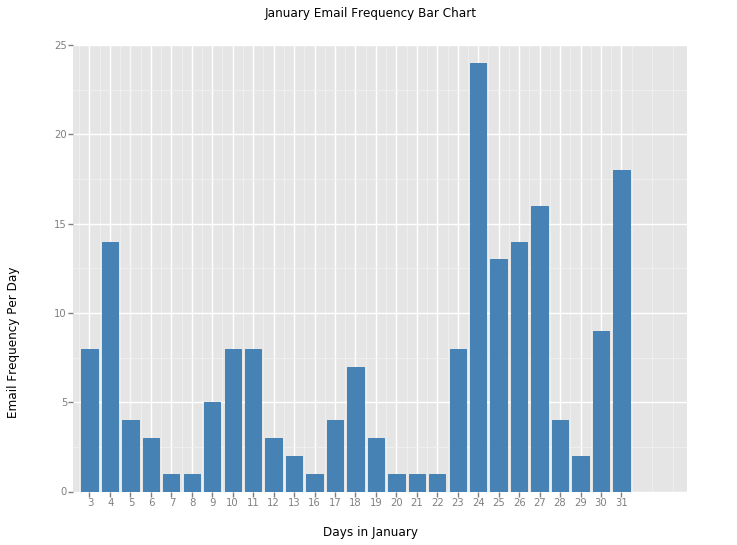

<ggplot: (299618677)>

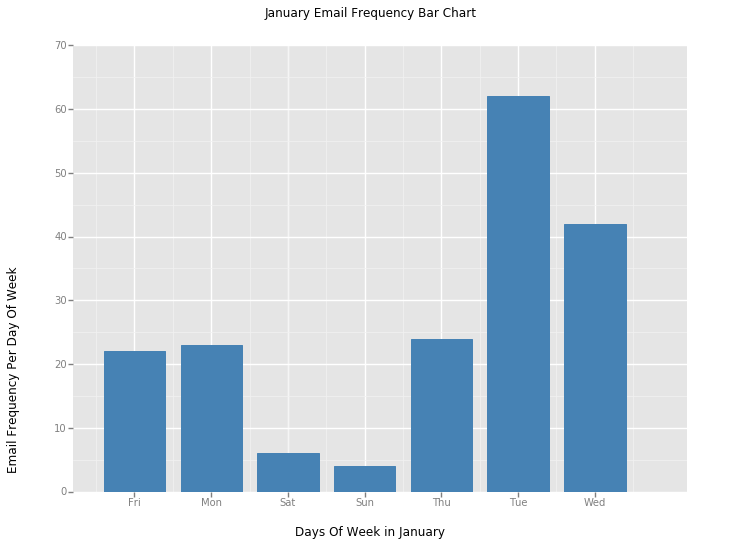

<ggplot: (299536137)>

In [11]:
jan_df = get_month_frame('Jan')
display(make_month_graph(jan_df),make_day_graph(jan_df)) 


# December

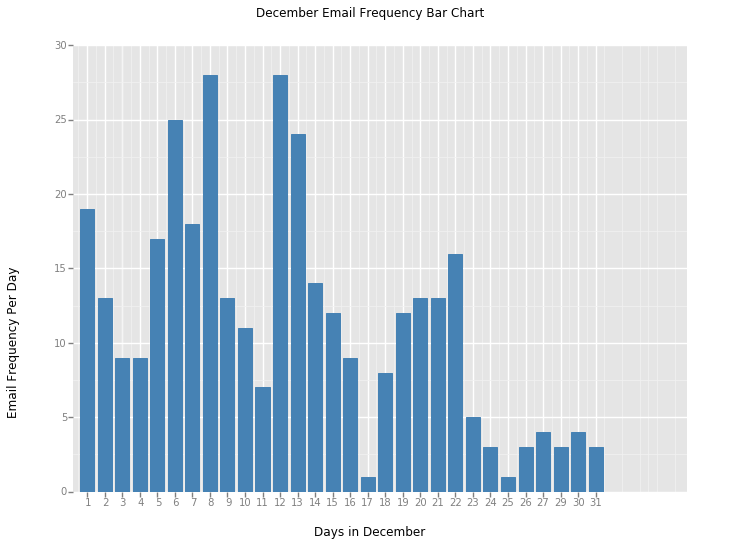

<ggplot: (299679301)>

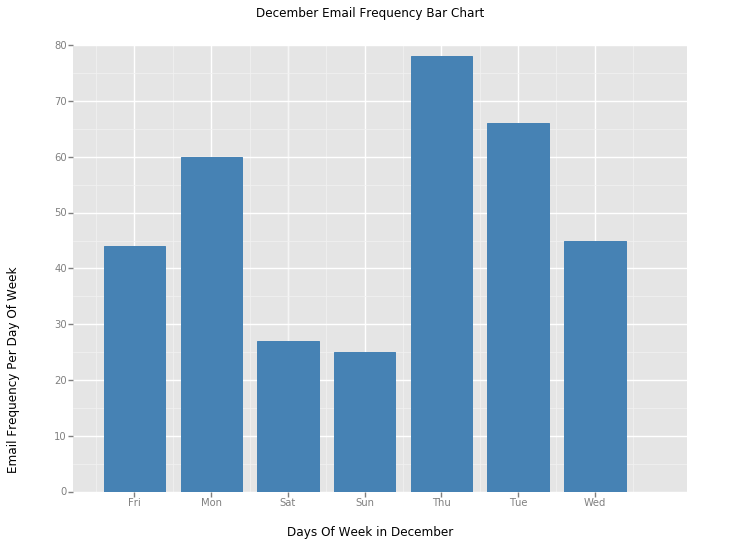

<ggplot: (299679385)>

In [12]:
dec_df = get_month_frame('Dec')
display(make_month_graph(dec_df),make_day_graph(dec_df)) 

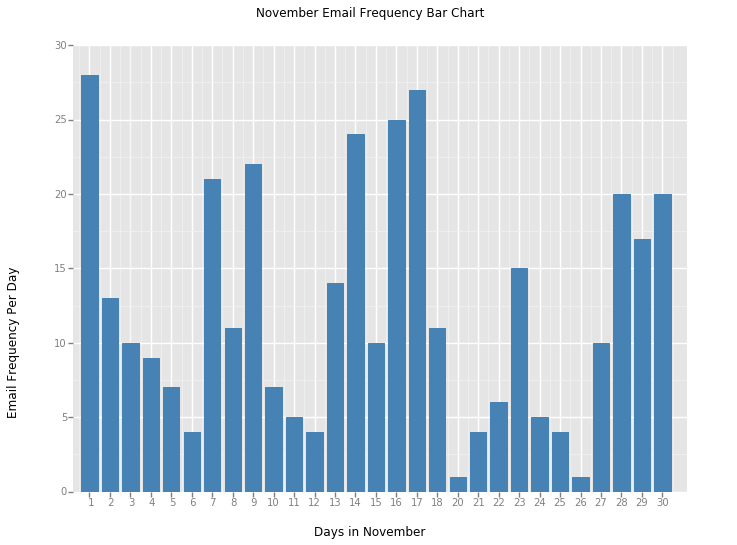

<ggplot: (299538537)>

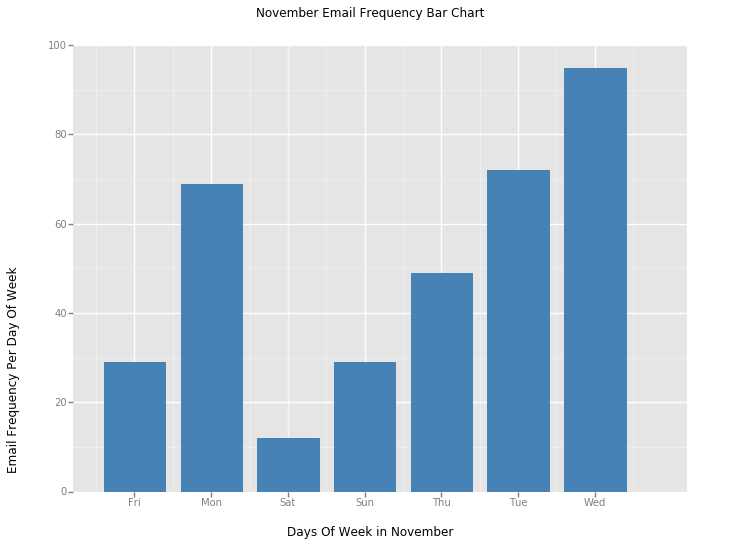

<ggplot: (299534161)>

In [16]:
Nov_df = get_month_frame('Nov')
display(make_month_graph(Nov_df),make_day_graph(Nov_df))

In [19]:
d = get_month_frame('Dec')
n = get_month_frame('Nov')
o = get_month_frame('Oct')
s = get_month_frame('Sep')

#result = x.append(y)

def day_frequency_frame(f):
    f = f.set_index(['Month']) 
    f = f.drop_duplicates(['Day','Frequency'])
    return f.sort_values('Day')

x = day_frequency_frame(d)
y = day_frequency_frame(n)

g = x.append(y)

def frequency_frame(f):
    n = f[['Day','Frequency']]
    n = n.drop_duplicates(['Day','Frequency'])
    return n.sort_values('Day')



# Dashboard

In [20]:
import pandas as pd
import qgrid
qgrid.nbinstall()

HTML(df1.to_html(index=False))
grid = qgrid.show_grid(df1)
grid
